In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import imp
import sys
sys.path.insert(0,'/home/robin/Projects/sciunit')
sys.path.insert(0,'/home/robin/Projects/INM6/elephant')
sys.path.append('/home/robin/Projects/INM6/python-neo')
sys.path.append('/home/robin/Projects/NetworkUnit')
sys.path.append('/home/robin/Projects/INM6/Tasks/')
import sciunit
from viziphant.plots.rasterplot import rasterplot
from elephant.spike_train_surrogates import * 
from elephant.statistics import mean_firing_rate, cv, isi
from validation.matrix import eigenvalue_significance, plot_EVs
from validation.matrix import corr_matrix, plot_matrix, reorder_matrix
from scipy.linalg import eigh
from networkunit import models, tests, scores
from networkunit.plots import alpha
from networkunit.scores import to_precision
import seaborn as sns
from quantities import Hz, ms
from scipy.linalg import eigh
from IPython.core.display import HTML
import urllib2
# HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

sns.set(style='ticks', palette='Set2', context='poster')

In [2]:
size = 100
A = 5
cc = .2
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms

model_cpp = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=[A],
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, color=sns.color_palette('Set2')[2], name='HOC')

model_pwc = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=[A],
                                correlation_method='pairwise_equivalent', t_start=tstart, t_stop=tstop,
                                shuffle=False, color=sns.color_palette('Set2')[1], name='PWC')

palette = [model_cpp.color, model_pwc.color]

/usr/local/lib/python2.7/dist-packages/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)


In [90]:
class mat_test(sciunit.TestM2M, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'degree strength',
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = mat_test()
test.generate_prediction(model_cpp)
test.generate_prediction(model_pwc)
test.visualize_samples(model_cpp, model_pwc)

### Degree Strength

In [3]:
class graph_test(sciunit.TestM2M, tests.graph_centrality_helperclass, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'degree strength',
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = graph_test()

In [4]:
test.generate_prediction(model_cpp)
test.generate_prediction(model_pwc)

array([ 0.71413506,  0.80676175,  0.81664624,  0.87312252,  0.69364774,
        0.9886567 ,  0.67218857,  0.79567137,  0.94423314,  0.79857922,
        0.80551571,  0.67450263,  0.74869951,  0.79440061,  0.81871189,
        0.85195882,  0.83697863,  0.83445577,  0.62768888,  0.69672831,
        0.6725813 ,  0.60263361,  0.52271914,  0.65846722,  0.57792432,
        0.43256553,  0.406684  ,  0.57547138,  0.44632691,  0.5473848 ,
        0.67985283,  0.65980783,  0.60288709,  0.3950772 ,  0.70924757,
        0.59192915,  0.44651631,  0.60841083,  0.56427084,  0.42291365,
        0.72125625,  0.47811768,  0.45967258,  0.50826116,  0.44314924,
        0.50694105,  0.68799124,  0.71030552,  0.50305621,  0.61358624,
        0.38986161,  0.5214591 ,  0.44032971,  0.57883775,  0.46662299,
        0.7299787 ,  0.52593231,  0.61549883,  0.51587163,  0.45336884,
        0.65267389,  0.67137175,  0.32996848,  0.52162843,  0.50583252,
        0.47471511,  0.6811952 ,  0.41817612,  0.59825176,  0.45

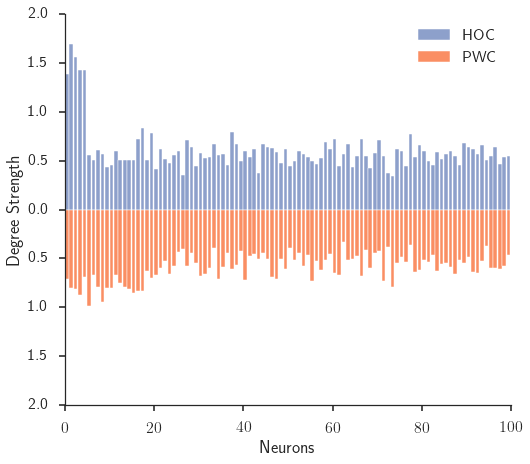

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
test.visualize_samples(model_cpp, model_pwc, ax=ax, palette=palette)
sns.despine()
ax.set_title('')
ax.set_ylabel('Degree Strength')
plt.legend()
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/degree_strength_example.png')
plt.show()

### Closeness

In [7]:
class graph_test(sciunit.TestM2M, tests.graph_centrality_helperclass, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'closeness',
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = graph_test()

In [8]:
test.generate_prediction(model_cpp)

array([ 14611.8204352 ,  17089.62466127,  17266.61581525,  22449.19650329,
        22928.58588445,  19353.00912341,  16011.21277167,  11466.05842782,
        13813.80611424,  21892.73836958,  17734.50520559,  15330.53405136,
        19348.59840273,  19412.35837439,   7445.51579053,  17538.93218722,
        15352.39793623,  10281.58891614,  17873.16891514,  22293.03060132,
        15447.18635798,   5339.19901175,  12515.77916096,  19817.15123925,
        22871.49472087,  22334.30291701,  10320.42156695,  13986.68310474,
        19735.5904924 ,  14387.14902189,   9194.86851785,  14826.51847329,
        20581.47493407,   8723.06958901,  11092.78342815,  20090.23517749,
        22570.36111667,  15373.88935919,  22739.82751042,  17661.95349805,
        20873.26723346,  15760.20270301,  14974.90712178,   5825.01167324,
        14579.74561235,  19178.46550791,  22574.16496224,   7552.53194609,
        19837.39626291,  21147.59458623,  22672.24871998,  17769.49860275,
        15922.80709656,  

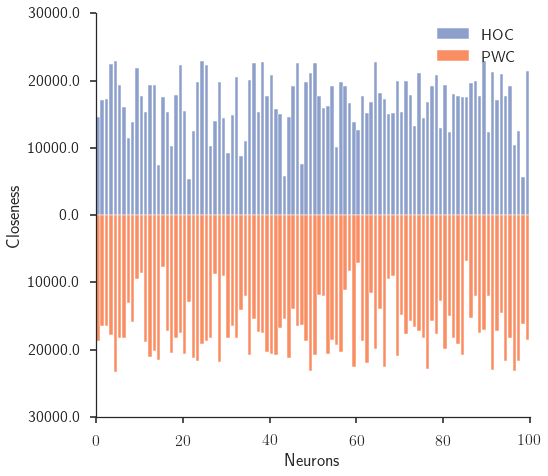

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
test.visualize_samples(model_cpp, model_pwc, ax=ax, palette=palette)
sns.despine()
ax.set_title('')
ax.set_ylabel('Closeness')
fig.tight_layout()
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/closeness_example.png')
plt.show()

### Betweenness

In [13]:
class graph_test(sciunit.TestM2M, tests.graph_centrality_helperclass, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'betweenness',
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = graph_test()

In [14]:
test.generate_prediction(model_cpp)

array([ 0.00103072,  0.00762729,  0.01236858,  0.10224696,  0.1158524 ,
        0.01381159,  0.01855288,  0.        ,  0.        ,  0.05050505,
        0.002886  ,  0.        ,  0.03339518,  0.03813647,  0.00103072,
        0.        ,  0.00391672,  0.        ,  0.01710987,  0.08245723,
        0.        ,  0.        ,  0.        ,  0.02360338,  0.1108019 ,
        0.03580018,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00247372,  0.00989487,  0.05297877,  0.00041229,  0.        ,
        0.04535147,  0.03270803,  0.0387549 ,  0.0253556 ,  0.02267574,
        0.00515358,  0.00020614,  0.04411462,  0.00061843,  0.04329004,
        0.0713255 ,  0.03318903,  0.        ,  0.02298495,  0.01525459,
        0.06005635,  0.02185116,  0.00020614,  0.01566687,  0.09647495,
        0.02123274,  0.02411874,  0.01597609,  0.        ,  0.00061843,
        0.0253556 ,  0.        ,  0.05297877,  0.01875902,  0.0280011 ,
        0.01710987,  0.04864976,  0.        ,  0.        ,  0.08

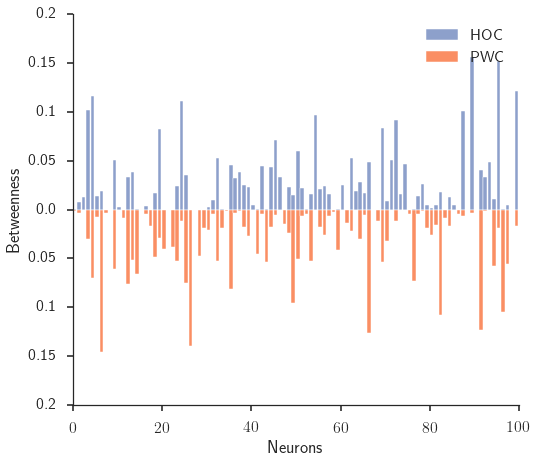

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
test.visualize_samples(model_cpp, model_pwc, ax=ax, palette=palette)
sns.despine()
ax.set_title('')
ax.set_ylabel('Betweenness')
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/betweenness_example.png')
plt.show()

### Clustering Coefficient

In [17]:
class graph_test(sciunit.TestM2M, tests.graph_centrality_helperclass, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'clustering coefficient',
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = graph_test()

In [18]:
test.generate_prediction(model_cpp)

array([ 0.02818084,  0.02822204,  0.02712617,  0.02239956,  0.02104625,
        0.01398227,  0.01667524,  0.01901952,  0.02085754,  0.0154473 ,
        0.01473772,  0.01820783,  0.01764269,  0.0136826 ,  0.01733483,
        0.01450345,  0.01998648,  0.02017298,  0.01748864,  0.01780203,
        0.01225628,  0.0202453 ,  0.01688759,  0.01641597,  0.01358587,
        0.01615965,  0.01692582,  0.02166395,  0.01881914,  0.01807242,
        0.01868354,  0.01739242,  0.01558571,  0.01935119,  0.02036063,
        0.01751494,  0.01377563,  0.01891721,  0.01767889,  0.01582185,
        0.01403802,  0.0150956 ,  0.0156407 ,  0.01462234,  0.01506378,
        0.01478098,  0.01733878,  0.0177244 ,  0.01437815,  0.01619114,
        0.01657672,  0.01671081,  0.01798678,  0.01567651,  0.01312571,
        0.01677798,  0.01360253,  0.01773373,  0.02076087,  0.01808723,
        0.01867426,  0.01491394,  0.01491958,  0.01927291,  0.01304758,
        0.01496414,  0.01907177,  0.01670875,  0.01682892,  0.01

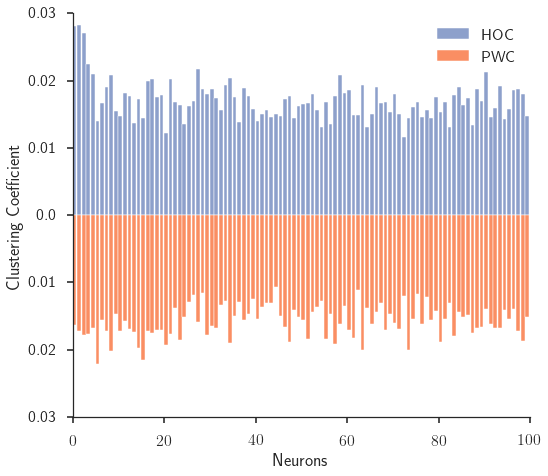

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
test.visualize_samples(model_cpp, model_pwc, ax=ax, palette=palette)
sns.despine()
ax.set_title('')
ax.set_ylabel('Clustering Coefficient')
fig.tight_layout()
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/clustering_coefficient_example.png')
plt.show()

### Transitivity

In [15]:
size = 100
A = [5]
cc = .2
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms

model_cpp = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, color=sns.color_palette('Set2')[2], name='test data')

In [16]:
class graph_test(sciunit.TestM2M, tests.graph_centrality_helperclass, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'transitivity',
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = graph_test()

In [17]:
test.generate_prediction(model_cpp)

0.08770161290322581

0.195652173913
0.0512820512821


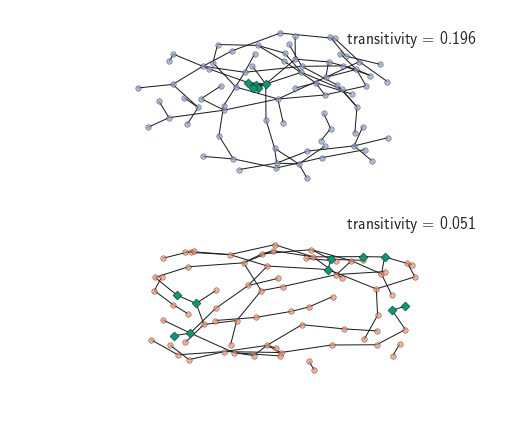

In [77]:
from copy import copy
import networkx as nx

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,7), sharex=True)
fig.subplots_adjust(hspace = -.1, wspace=0)
models = [model_cpp, model_pwc]

for count, ax in enumerate(axes):
    weight_matrix = copy(models[count].prediction[test.test_hash])
    np.fill_diagonal(weight_matrix, 0)
#     print np.max(weight_matrix)
    N = len(weight_matrix)
    B = 5000
    Z = 2.56 / np.sqrt(B - 3.)
    edge_threshold = (np.exp(2. * Z) - 1.) / (np.exp(2. * Z) + 1.) 
#     print edge_threshold
    # edge_threshold = 0.05
    non_edges = np.where(weight_matrix <= edge_threshold)
    weight_matrix[non_edges[0], non_edges[1]] = 0.
    np.fill_diagonal(weight_matrix, 0)
    triu_idx = np.triu_indices(N, 1)
    weight_list = weight_matrix[triu_idx[0], triu_idx[1]]
    graph_list = [(i, j, w) for i, j, w in
                  zip(triu_idx[0], triu_idx[1], weight_list) if w]
    G = nx.Graph()
    G.add_weighted_edges_from(graph_list)
    print  nx.transitivity(G)

    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos, k=.9, node_size=30, 
                           node_color=palette[count], alpha=.7, ax=ax)
    nx.draw_networkx_edges(G,pos, ax=ax)
    
    if count:
        pw_nodes = [0,1,2,3,4,5,6,7,8,9]
        nodelist = [n for n in pw_nodes if n in G.nodes()]
    else:
        nodelist = [0,1,2,3,4]

    nx.draw_networkx_nodes(G,pos, node_size=40,
                           nodelist=nodelist,
                           node_color='g',#sns.color_palette('Set2')[5],
                           node_shape='D', ax=ax)
    ax.text(.65, .85, 'transitivity = {:.3f}'.format(nx.transitivity(G)), 
            fontsize=17, transform=ax.transAxes)
    ax.set_axis_off()
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/transitivity_example.png', bbox_inches='tight')

### Small-worldness

In [82]:
class graph_test(sciunit.TestM2M, tests.graph_centrality_helperclass, tests.correlation_matrix_test):
    score_type = scores.ks_distance
    params = {'graph_measure': 'small-worldness',
              'edge_threshold': 0.,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
             }

test = graph_test()
size = 100
A = [5]
cc = .2
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms

model_cpp = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, color=sns.color_palette('Set2')[2], name='test data')

test = graph_test()
test.generate_prediction(model_cpp)

0.57660224713170505

In [85]:
N = 1000
sw_hoc = np.zeros(N)
sw_pwc = np.zeros(N)

for i in range(N):
    size = 100
    A = [5]
    cc = .2
    rate = 10*Hz
    tstart = 0*ms
    tstop = 10000*ms
    binsize = 2*ms

    model_cpp = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                    correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                    shuffle=False, color=sns.color_palette('Set2')[2], name='HOC')
    model_pwc = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                correlation_method='pairwise_equivalent', t_start=tstart, t_stop=tstop,
                                shuffle=False, color=sns.color_palette('Set2')[1], name='PWC')

    test = graph_test()
    sw_hoc[i] = test.generate_prediction(model_cpp)
    sw_pwc[i] = test.generate_prediction(model_pwc)

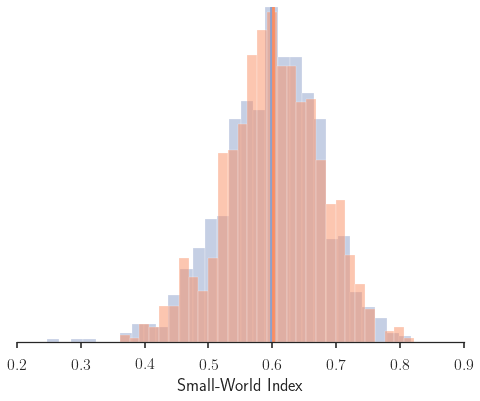

In [97]:
sns.set(context='poster', style='ticks', palette='Set2')
fig, ax = plt.subplots(figsize=(8,6))
# print sw
hist, edges = np.histogram(sw_hoc, bins=30, density=True)
ax.bar(edges[:-1], hist, width=np.diff(edges)[0], color=sns.color_palette('Set2')[2], edgecolor='w', alpha=.5)
ax.axvline(np.mean(sw_hoc), color=sns.color_palette('Set2')[2], ls='-')

hist, edges = np.histogram(sw_pwc, bins=30, density=True)
ax.bar(edges[:-1], hist, width=np.diff(edges)[0], color=sns.color_palette('Set2')[1], edgecolor='w', alpha=.5)
ax.axvline(np.mean(sw_pwc), color=sns.color_palette('Set2')[1], ls='-')

sns.despine(left=True)
ax.set_yticks([])
ax.set_yticklabels([''])
ax.set_xlabel('Small-World Index')
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/small-world_example.png', bbox_inches='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c78110f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c784d1190>], dtype=object)

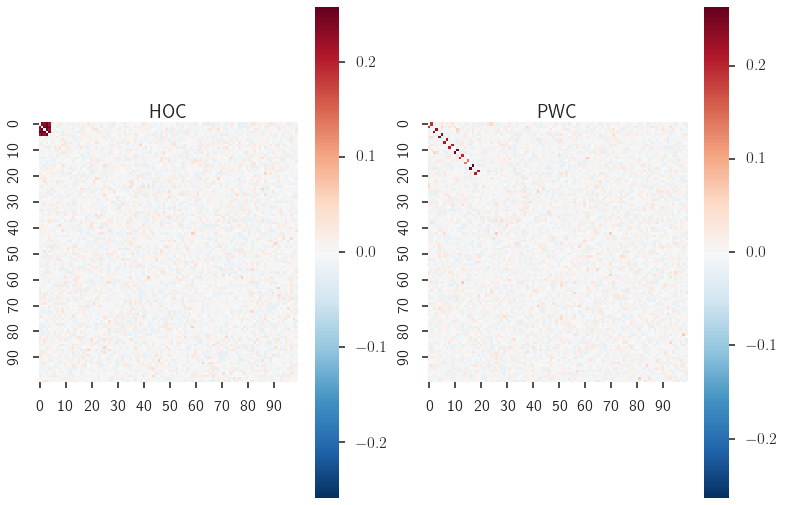

In [91]:
test = mat_test()
test.generate_prediction(model_cpp)
test.generate_prediction(model_pwc)
test.visualize_samples(model_cpp, model_pwc)